In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def square(amp,offset,period,density,start,end):
    length = (end-start)*density
    y = np.zeros(length,float)
    y.fill(offset)
    for x in range(length):
        x -= start
        if (x/density)%period < period/2:
            y[x] += amp
        else:
            y[x] -= amp
    x = np.linspace(start,end,(end-start)*density)
    return x,y

def sin(x,amp,period,phase,offset):
    return amp*np.sin(2*np.pi/period*x-phase)+offset

def integrate(x,y):
    length = len(x)-1
    total = 0
    for i in range(length):
        total += (x[i+1]-x[i]) * (y[i]+y[i+1])
    return total/2

def fourier(y,max_term=np.Inf):
    length = min(len(y),max_term)
    x = np.linspace(0,len(y),len(y))
    print(x)
    an = [sum(y)]
    bn = [0]
    for a in range(1,int(length/2)):
        an.append(np.dot(y,np.cos(2*np.pi/len(y)*a*x)))
    for b in range(1,int(length/2)):
        bn.append(np.dot(y,np.sin(2*np.pi/len(y)*b*x))) 
    return an,bn

(array([   9.38721764, 2393.98326972,    3.18202147,   51.28148243]),
 array([[ 2.40002281e-05, -5.66183789e-05,  2.97547544e-07,
         -2.85051702e-09],
        [-5.66183789e-05,  2.89421422e-02, -1.52165986e-04,
          1.14776006e-06],
        [ 2.97547544e-07, -1.52165986e-04,  1.06977755e-06,
         -1.23819431e-08],
        [-2.85051702e-09,  1.14776006e-06, -1.23819431e-08,
          1.19150063e-05]]))

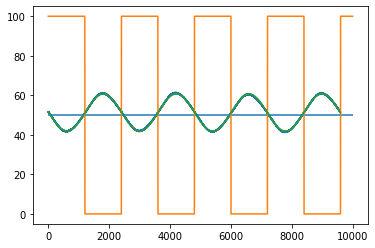

In [45]:
x1, y1 = np.loadtxt("thermal_4min_a.txt", unpack=True, skiprows=3)
plt.plot(x1,y1)

x2, y2 = square(50,50,2400,100,0,10000)
plt.plot(x2,y2)

plt.hlines(50,0,10000)

para = curve_fit(sin,x1,y1,p0=[10,2400,np.pi,50])
plt.plot(x1,sin(x1,*para[0]))
para

[0.00000000e+00 1.00041684e+00 2.00083368e+00 ... 2.39799917e+03
 2.39899958e+03 2.40000000e+03]


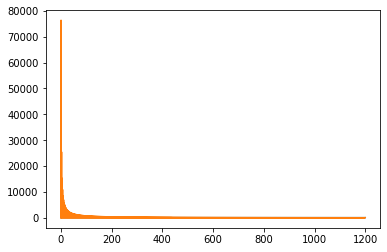

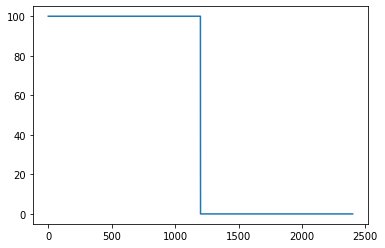

In [92]:
x2, y2 = square(50,50,2400,1,0,2400)

a2, b2 = fourier(y2)
plt.plot(a2)
plt.plot(b2)
plt.show()

plt.plot(x2,y2)



In [102]:
x1, y1 = np.loadtxt("thermal_4min_a.txt", unpack=True, skiprows=3)
an,bn = fourier(y1)


[0.00000000e+00 1.00010418e+00 2.00020836e+00 ... 9.59799979e+03
 9.59899990e+03 9.60000000e+03]


(0.0, 100.0)

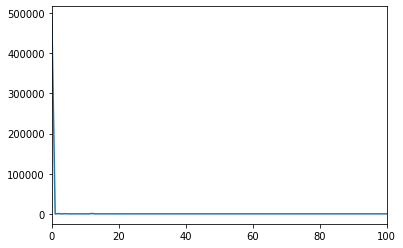

In [103]:
plt.plot(an)
plt.xlim(0,100)


(0.0, 100.0)

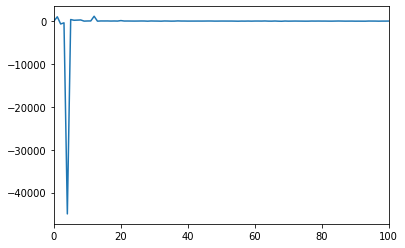

In [104]:
plt.plot(bn)
plt.xlim(0,100)

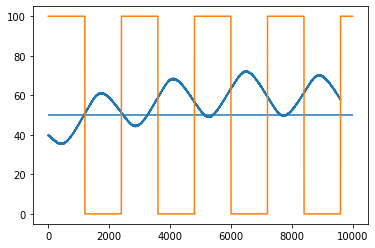

In [9]:
x1, y1 = np.loadtxt("thermal_4min_b.txt", unpack=True, skiprows=3)
plt.plot(x1,y1)

x2, y2 = square(50,50,2400,100,0,10000)
plt.plot(x2,y2)

plt.hlines(50,0,10000)